In [53]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
from matplotlib import animation
%matplotlib inline

In [2]:
data  = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/data_500.dat', sep = ' ', header=None)
rand0 = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/rand0_500.dat',sep = ' ', header=None)

In [3]:
# Pasamos los datos a un array numpy
data = np.array(data.T[0:3].T)
rand = np.array(rand0.T[0:3].T)

In [24]:
nn = np.histogramdd(np.array([data[:,0],data[:,1],data[:,2]]).T,bins =30, range=[[0,180],[0,180],[0,180]])[0]
#rr = np.histogramdd(np.array([data[:,0],data[:,1],data[:,2]]).T,bins =30)[0]

In [182]:
#FUNCIÓN DE PARA HACER HISTOGRAMAS 
def Histos(p,p_r,bn,point_max):
    """ 
    Función para construir los histogramas 
    
    p = datos
    p_r = random
    bn = tamaño de bins
    point_max = punto máximo en el histograma
    
    """
    
    #Inicializamos los arreglos de los histogramas
    NDDD = np.zeros((bn,bn,bn))
    NRRR = np.zeros((bn,bn,bn))
    NDDR = np.zeros((bn,bn,bn))
    NDRR = np.zeros((bn,bn,bn))
    
    # =========================================================================================== 
    
    n = 0
    for (ii, jj) in zip(p, p_r):
        n = n+1
        
        s = ii-p[n:] # Diferencia entre el punto pivote y los demas puntos siguientes 
        r = np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2)
        
        s_ran = jj-p_r[n:] # Diferencia entre el punto pivote y los demas puntos siguientes 
        r_ran = np.sqrt(s_ran[:,0]**2+s_ran[:,1]**2+s_ran[:,2]**2)
        
        m = 0
        stop = len(p[n:])
        stop_ran = len(p_r[n:])
        for (kk, ll) in zip(p[n:], p_r[n:]):
            if m == stop:
                continue
            else:
                #DDD ===============================================================================
                r12 = np.ones_like(r[m+1:])*r[m]
                r13 = r[m+1:]
            
                ss = kk-p[n:][m+1:] # Diferencia entre el punto pivote y los demas puntos siguientes 
                r32 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
            
                # Histogramas para DDD
                dis, dim = np.histogramdd(np.array([r12,r13,r32]).T,bins = [bn,bn,bn], 
                                    range=[[0,point_max],[0,point_max],[0,point_max]])
                NDDD = NDDD + dis
            if m == stop_ran:
                continue
            else:
                #RRR ===============================================================================
                r12 = np.ones_like(r_ran[m+1:])*r_ran[m]
                r13 = r_ran[m+1:]
            
                ss = ll-p_r[n:][m+1:] # Diferencia entre el punto pivote y los demas puntos siguientes 
                r32 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
            
                # Histogramas para RRR
                dis, dim = np.histogramdd(np.array([r12,r13,r32]).T,bins =[bn,bn,bn], 
                                    range=[[0,point_max],[0,point_max],[0,point_max]])
                NRRR = NRRR + dis  
            
                m = m+1
    
    # =========================================================================================== 
    
    n = 0
    for (ii, jj) in zip(p, p_r):
        n = n+1
        
        s = ii-p[n:] # Diferencia entre el punto pivote y los demas puntos siguientes 
        r = np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2)
        
        s_ran = jj-p_r[n:] # Diferencia entre el punto pivote y los demas puntos siguientes 
        r_ran = np.sqrt(s_ran[:,0]**2+s_ran[:,1]**2+s_ran[:,2]**2)
        
        m = 0
        for (kk, ll) in zip(p[n:], p_r[n:]):
            
            #DDR ===============================================================================
            r12 = np.ones_like(p_r.T[0])*r[m]
            
            ss = ii-p_r # Diferencia entre el punto pivote y el punto en la muestra random 
            r13 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
            
            ss = kk-p_r # Diferencia entre el punto 2 de los datos y el punto en la muestra random 
            r32 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
            
            # Histogramas para DDR
            dis, dim = np.histogramdd(np.array([r12,r13,r32]).T,bins = [bn,bn,bn], 
                                    range=[[0,point_max],[0,point_max],[0,point_max]])
            NDDR = NDDR + dis
            
            #DRR ===============================================================================
            r12 = np.ones_like(p.T[0])*r_ran[m]
            
            ss = jj-p # Diferencia entre el punto pivote random y el punto en los datos 
            r13 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
            
            ss = ll-p # Diferencia entre el punto 2 de la muestra random y el punto en los datos 
            r32 = np.sqrt(ss[:,0]**2+ss[:,1]**2+ss[:,2]**2)
            
            # Histogramas para DRR
            dis, dim = np.histogramdd(np.array([r12,r13,r32]).T,bins = [bn,bn,bn], 
                                    range=[[0,point_max],[0,point_max],[0,point_max]])
            NDRR = NDRR + dis
            
            m = m+1
    
    return dim, NDDD, NRRR, NDDR, NDRR

In [183]:
start = time.perf_counter()

bins = 30
dim, NDDD, NRRR, NDDR, NDRR = Histos(data,rand,bins,180)

finish = time.perf_counter()

print(f'Finializó en {round(finish-start,2)} segundos')

Finializó en 176.18 segundos


In [184]:
#Función de correlación Landy-Szalay
def estim_ss(NDDD, NRRR, NDDR, NDRR):
    return (NDDD - 3*NDDR + 3*NDRR - NRRR)/NRRR

In [185]:
estim_ss = estim_ss(NDDD, NRRR, NDDR, NDRR)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [187]:
estim_ss[np.where(np.isnan(estim_ss))] = 0
estim_ss[np.where(np.isinf(estim_ss))] = 0

In [188]:
def imag(x,y,t,cmap):
    plt.figure(figsize=(6,6), dpi=100)
    plt.imshow(x,origin='lower',cmap=cmap)
    cax=plt.colorbar()
    plt.contour(x,10,cmap=plt.cm.gray,linewidths=0.5)
    plt.ylabel('$r_{12}$',fontsize = 16)
    plt.xlabel('$r_{13}$',fontsize = 16)
    plt.title(y,fontsize = 16)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax.set_label(t,labelpad = 15,fontsize = 15)
    line_colour1 = ('royalblue', 'blue', 'mediumblue', 'darkblue')
    plt.plot()

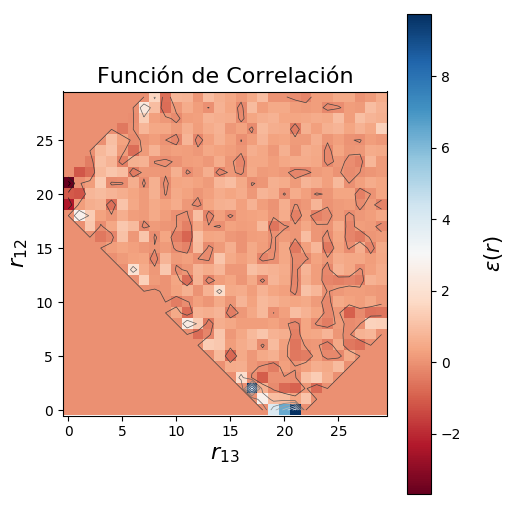

In [189]:
imag(estim_ss[20],'Función de Correlación','$\epsilon(r)$',cmap='RdBu')

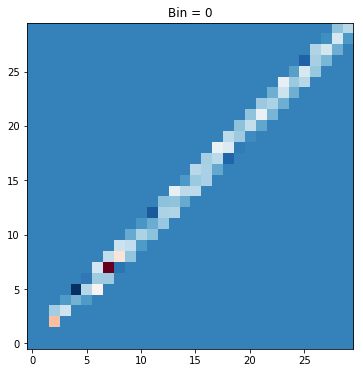

In [190]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(6,6))

# Plot the initial frame. 
cax = plt.imshow(estim_ss[0,:,:],origin='lower',cmap='RdBu')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(estim_ss[frame,:,:])
    plt.imshow(estim_ss[frame,:,:],origin='lower',cmap='RdBu')
    ax.set_title("Bin = " + str(frame)[:13])

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=30,       # Could also be iterable or list
    interval=200     # ms between frames
)
HTML(ani.to_html5_video())